In [9]:
import sys
import os
import pandas as pd
import pickle

import networkx as nx


sys.path.append(os.path.abspath('..'))

from src.features.structural_alg import get_clustering_coefficient

In [10]:
with open("../data/processed/amazon_graph.pickle", "rb") as f:
    G = pickle.load(f)

In [11]:
# Using NetworkX function
clust_coeff_nx = nx.clustering(G, weight=None)

In [12]:
# Save results

df_clus_nx = pd.DataFrame(list(clust_coeff_nx.items()), columns=['ASIN', 'ClusteringCoefficient'])
display(df_clus_nx.head(5))
# Save to CSV
df_clus_nx.to_csv("../data/processed/clus_scores_nx.csv", index=False)
# Now you can use the scores
print(f"Computed cc for {len(clust_coeff_nx)} nodes.")

,ASIN,ClusteringCoefficient
0,0827229534,0.290323
1,0738700797,0.563953
2,0842328327,0.400000
3,1577943082,0.888889
4,0486220125,0.333333


Computed cc for 334843 nodes.


In [13]:
# Using hand-made function
clust_coeffs = get_clustering_coefficient(G, M=G.number_of_edges())

In [14]:
# Save results

df_clust = pd.DataFrame(list(clust_coeffs.items()), columns=['ASIN', 'ClusteringCoefficient'])
display(df_clust.head(5))
# Save to CSV
df_clust.to_csv("../data/processed/clus_scores.csv", index=False)

# Now you can use the scores
print(f"Computed cc for {len(clust_coeffs)} nodes.")

,ASIN,ClusteringCoefficient
0,0827229534,0.136364
1,0738700797,0.241758
2,0842328327,0.333333
3,1577943082,0.450000
4,0486220125,0.250000


Computed cc for 334843 nodes.


Number of nodes with zero clustering coefficient (nx): 69773


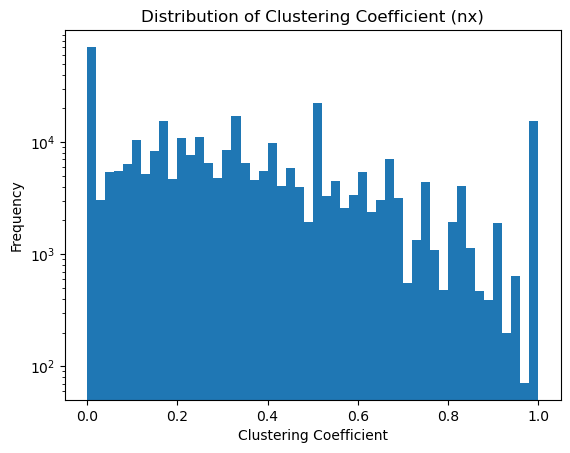

In [15]:
# Number of zero elements in clustering coefficient using NetworkX function
zero_count = (df_clus_nx['ClusteringCoefficient'] == 0.0).sum()
print(f"Number of nodes with zero clustering coefficient (nx): {zero_count}")

# Distribution of clustering coefficient values
import matplotlib.pyplot as plt
plt.hist(df_clus_nx['ClusteringCoefficient'], bins=50)
plt.title('Distribution of Clustering Coefficient (nx)')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()

Number of nodes with zero clustering coefficient (test): 69773


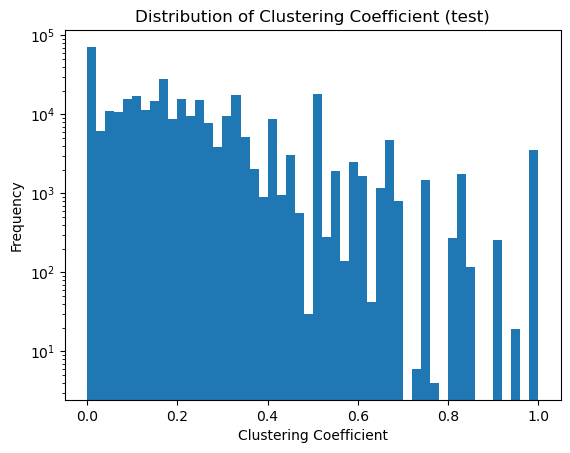

In [16]:
# Number of zero elements in clustering coefficient using hand-made function
zero_count_test = (df_clust['ClusteringCoefficient'] == 0.0).sum()
print(f"Number of nodes with zero clustering coefficient (test): {zero_count_test}")

# Distribution of clustering coefficient values using hand-made function
plt.hist(df_clust['ClusteringCoefficient'], bins=50)    
plt.title('Distribution of Clustering Coefficient (test)')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.yscale('log')  # Set y-axis to logarithmic scale
plt.show()